DSCI 552: Homework #5

Michael Hanono

ID: 1426377592

November 2021

In [ ]:
!pip install pandas
!pip install -U scikit-learn
!pip install numpy
!pip install imbalanced-learn
!pip install matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import hamming 
from sklearn.preprocessing import MultiLabelBinarizer
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

1. Multi-class and Multi-Label Classification Using Support Vector Machines

    (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
# Get the data from the file and separate into X and Y
data = pd.read_csv('../data/Frogs_MFCCs.csv')
X = data.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
Y = data[['Family', 'Genus', 'Species']].copy()

# Get the training and testing sets from the data
trainingX, testingX, trainingY, testingY = train_test_split(X, Y, test_size=0.3, random_state=42)

    (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:


    i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

    Multi-class classification problems have classes that are mutually exclusive, whereas multi-label classification problems have labels that represent a different classification task, but the tasks are somehow related. 
    
    - Exact Match Ratio: It is the most strict metric, indicating the percentage of samples that have all their lables classified correctly. One disadvantage of this measure is that multi-class classification problems have a chance of being partially correct, but here we ignore those partially correct matches. 

    - Hamming-Loss: It is the fraction of lables that are incorrectly predicted, i.e., the fraction of the wrong labels to the totla number of labels. 

    ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [7]:
# Get the ranges recoomended from the homework worksheet and put them into a dictionary
rangeGamma = np.arange(0.1, 1, 0.1)
rangeC = np.logspace(-2, 7, 10)
parameterDict = dict(estimator__gamma=rangeGamma, estimator__C=rangeC)

In [8]:
# Train one vs rest SVM with a Gaussian Kernel for Family

# Get the training y for Family
familyTrainingY = trainingY['Family']

# Define the classifier that will be used 
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', cache_size=2000))

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifier, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, familyTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Family are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
familyTestingY = testingY['Family']
print('Classification Report')
print(classification_report(familyTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(familyTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Family are: {'estimator__C': 100.0, 'estimator__gamma': 0.8}, and they have a score of 0.9920571807251728
Classification Report
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.93      0.96        27
  Dendrobatidae       0.99      1.00      1.00       162
        Hylidae       0.99      1.00      0.99       623
Leptodactylidae       1.00      1.00      1.00      1347

       accuracy                           1.00      2159
      macro avg       1.00      0.98      0.99      2159
   weighted avg       1.00      1.00      1.00      2159

The fraction of labels incorrectly predicted is hamming_score = 0.004631773969430292


In [9]:
# Train one vs rest SVM with a Gaussian Kernel for Genus

# Get the training y for Genus
genusTrainingY = trainingY['Genus']

# Define the classifier that will be used 
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', cache_size=2000))

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifier, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, genusTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Genus are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
genusTestingY = testingY['Genus']
print('Classification Report')
print(classification_report(genusTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(genusTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Genus are: {'estimator__C': 10.0, 'estimator__gamma': 0.9}, and they have a score of 0.9898718798321184
Classification Report
               precision    recall  f1-score   support

    Adenomera       1.00      0.99      0.99      1251
     Ameerega       0.99      1.00      1.00       162
Dendropsophus       0.96      0.96      0.96        84
    Hypsiboas       0.98      1.00      0.99       468
Leptodactylus       0.98      0.96      0.97        96
Osteocephalus       0.94      0.88      0.91        34
     Rhinella       1.00      0.93      0.96        27
       Scinax       0.97      0.95      0.96        37

     accuracy                           0.99      2159
    macro avg       0.98      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159

The fraction of labels incorrectly predicted is hamming_score = 0.0111162575266327


In [10]:
# Train one vs rest SVM with a Gaussian Kernel for Species

# Get the training y for Species
speciesTrainingY = trainingY['Species']

# Define the classifier that will be used 
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', cache_size=2000))

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifier, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, speciesTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Species are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
speciesTestingY = testingY['Species']
print('Classification Report')
print(classification_report(speciesTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(speciesTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Species are: {'estimator__C': 10.0, 'estimator__gamma': 0.9}, and they have a score of 0.989671889299126
Classification Report
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.97      0.98       220
AdenomeraHylaedactylus       1.00      1.00      1.00      1031
    Ameeregatrivittata       0.99      1.00      1.00       162
            HylaMinuta       0.96      0.96      0.96        84
  HypsiboasCinerascens       0.95      0.99      0.97       135
     HypsiboasCordobae       0.99      1.00      1.00       333
   LeptodactylusFuscus       0.98      0.97      0.97        96
 OsteocephalusOophagus       0.94      0.88      0.91        34
     Rhinellagranulosa       1.00      0.96      0.98        27
           ScinaxRuber       1.00      0.97      0.99        37

              accuracy                           0.99      2159
             macro avg       0.98      0.97      0.98      2159
          weigh

    iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [11]:
# Change the parameters of the dictionary for the linear SVC
rangeC = np.logspace(-2, 7, 10)
parameterDict = dict(C = rangeC)
parameterDict

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07])}

In [12]:
# Train L1-penalized SVM for Family

# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
trainingX = scaler.fit_transform(trainingX)
testingX = scaler.transform(testingX)

# Get training Y for Family
familyTrainingY = trainingY['Family']

# Define L1-penalzied classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingX, familyTrainingY)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, familyTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Family are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
familyTestingY = testingY['Family']
print('Classification Report')
print(classification_report(familyTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(familyTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Family are: {'C': 1.0}, and they have a score of 0.9406288459717882
Classification Report
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.00      0.00      0.00       162
        Hylidae       0.85      0.06      0.11       623
Leptodactylidae       0.63      1.00      0.77      1347

       accuracy                           0.64      2159
      macro avg       0.37      0.26      0.22      2159
   weighted avg       0.64      0.64      0.51      2159

The fraction of labels incorrectly predicted is hamming_score = 0.36220472440944884


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [13]:
# Train L1-penalized SVM for Genus

# Get training Y for Genus
genusTrainingY = trainingY['Genus']

# Define L1-penalzied classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingX, genusTrainingY)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, genusTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Genus are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
genusTestingY = testingY['Genus']
print('Classification Report')
print(classification_report(genusTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(genusTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Genus are: {'C': 10.0}, and they have a score of 0.9527422764997319
Classification Report
               precision    recall  f1-score   support

    Adenomera       0.64      0.98      0.78      1251
     Ameerega       0.72      0.92      0.81       162
Dendropsophus       0.86      0.07      0.13        84
    Hypsiboas       0.95      0.08      0.14       468
Leptodactylus       0.00      0.00      0.00        96
Osteocephalus       0.00      0.00      0.00        34
     Rhinella       0.00      0.00      0.00        27
       Scinax       0.00      0.00      0.00        37

     accuracy                           0.66      2159
    macro avg       0.40      0.26      0.23      2159
 weighted avg       0.67      0.66      0.55      2159

The fraction of labels incorrectly predicted is hamming_score = 0.3432144511347846


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [14]:
# Train L1-penalized SVM for Species

# Get training Y for Species
speciesTrainingY = trainingY['Species']

# Define L1-penalzied classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingX, speciesTrainingY)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingX, speciesTrainingY)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Species are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingX)

# Get the classification report for the testing data
speciesTestingY = testingY['Species']
print('Classification Report')
print(classification_report(speciesTestingY, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(speciesTestingY, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Species are: {'C': 10.0}, and they have a score of 0.9602847202499291
Classification Report
                        precision    recall  f1-score   support

        AdenomeraAndre       0.00      0.00      0.00       220
AdenomeraHylaedactylus       0.96      0.95      0.96      1031
    Ameeregatrivittata       0.19      1.00      0.31       162
            HylaMinuta       0.16      0.39      0.22        84
  HypsiboasCinerascens       0.00      0.00      0.00       135
     HypsiboasCordobae       0.31      0.05      0.08       333
   LeptodactylusFuscus       0.00      0.00      0.00        96
 OsteocephalusOophagus       0.00      0.00      0.00        34
     Rhinellagranulosa       0.00      0.00      0.00        27
           ScinaxRuber       0.00      0.00      0.00        37

              accuracy                           0.55      2159
             macro avg       0.16      0.24      0.16      2159
          weighted avg       0.53      0.55      0

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

    iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [15]:
# Use SMOTE to remedy class imbalance in the data
overSample = SMOTE()

# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
trainingX = scaler.fit_transform(trainingX)
testingX = scaler.transform(testingX)

In [16]:
# Get training and testing data with SMOTE for Family
trainingXSMOTE, familyTrainingSMOTE = overSample.fit_resample(trainingX, trainingY['Family'])
testingXSMOTE, familyTestingSMOTE = overSample.fit_resample(testingX, testingY['Family'])

# Get training Y data for family
familyTrainingYSMOTE = familyTrainingSMOTE

# Define the L1-penalized classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingXSMOTE, familyTrainingYSMOTE)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingXSMOTE, familyTrainingYSMOTE)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Family are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingXSMOTE)

# Get the classification report for the testing data
familyTestingYSMOTE = familyTestingSMOTE
print('Classification report')
print(classification_report(familyTestingYSMOTE, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(familyTestingYSMOTE, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Family are: {'C': 10.0}, and they have a score of 0.9512699200222272
Classification report
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00      1347
  Dendrobatidae       0.34      1.00      0.51      1347
        Hylidae       0.82      0.11      0.19      1347
Leptodactylidae       0.90      0.85      0.87      1347

       accuracy                           0.49      5388
      macro avg       0.51      0.49      0.39      5388
   weighted avg       0.51      0.49      0.39      5388

The fraction of labels incorrectly predicted is hamming_score = 0.5107646622123236


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [22]:
# Get training and testing data with SMOTE for Genus
trainingXSMOTE, genusTrainingSMOTE = overSample.fit_resample(trainingX, trainingY['Genus'])
testingXSMOTE, genusTestingSMOTE = overSample.fit_resample(testingX, testingY['Genus'])

# Get training Y data for Genus
genusTrainingYSMOTE = genusTrainingSMOTE

# Define the L1-penalized classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingXSMOTE, genusTrainingYSMOTE)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingXSMOTE, genusTrainingYSMOTE)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Genus are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingXSMOTE)

# Get the classification report for the testing data
genusTestingYSMOTE = genusTestingSMOTE
print('Classification report')
print(classification_report(genusTestingYSMOTE, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(genusTestingYSMOTE, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')

The best parameters for Genus are: {'C': 1000.0}, and they have a score of 0.9585206353808866
Classification report


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

               precision    recall  f1-score   support

    Adenomera       0.01      0.00      0.00      1251
     Ameerega       0.53      0.12      0.20      1251
Dendropsophus       0.13      1.00      0.23      1251
    Hypsiboas       0.42      0.01      0.02      1251
Leptodactylus       0.00      0.00      0.00      1251
Osteocephalus       0.00      0.00      0.00      1251
     Rhinella       0.00      0.00      0.00      1251
       Scinax       0.00      0.00      0.00      1251

     accuracy                           0.14     10008
    macro avg       0.14      0.14      0.06     10008
 weighted avg       0.14      0.14      0.06     10008

The fraction of labels incorrectly predicted is hamming_score = 0.8583133493205436


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Get training and testing data with SMOTE for Species
trainingXSMOTE, speciesTrainingSMOTE = overSample.fit_resample(trainingX, trainingY['Species'])
testingXSMOTE, speciesTestingSMOTE = overSample.fit_resample(testingX, testingY['Species'])

# Get training Y data for Species
speciesTrainingYSMOTE = speciesTrainingSMOTE

# Define the L1-penalized classifier
classifierL1 = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingXSMOTE, speciesTrainingYSMOTE)

# Get the parameter grid from the classifier with 10 fold CV and fit the model 
parameterGrid = GridSearchCV(classifierL1, param_grid=parameterDict, cv=10, n_jobs=-1)
parameterGrid.fit(trainingXSMOTE, speciesTrainingYSMOTE)

# Get the best parameters and the score from the model 
bestParameters = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best parameters for Family are: {bestParameters}, and they have a score of {bestScore}')

# Predict the parameters 
predictParameterGrid = parameterGrid.predict(testingXSMOTE)

# Get the classification report for the testing data
speciesTestingYSMOTE = speciesTestingSMOTE
print('Classification report')
print(classification_report(speciesTestingYSMOTE, predictParameterGrid))

# Calculate the Hamming Loss and the exact match ratio
hammingScore = hamming_loss(speciesTestingYSMOTE, predictParameterGrid)
print(f'The fraction of labels incorrectly predicted is hamming_score = {hammingScore}')


The best parameters for Family are: {'C': 100.0}, and they have a score of 0.9624438087454024
Classification report


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        AdenomeraAndre       0.00      0.00      0.00      1031
AdenomeraHylaedactylus       0.00      0.00      0.00      1031
    Ameeregatrivittata       0.10      1.00      0.18      1031
            HylaMinuta       0.00      0.00      0.00      1031
  HypsiboasCinerascens       0.00      0.00      0.00      1031
     HypsiboasCordobae       0.18      0.02      0.03      1031
   LeptodactylusFuscus       0.00      0.00      0.00      1031
 OsteocephalusOophagus       0.00      0.00      0.00      1031
     Rhinellagranulosa       0.00      0.00      0.00      1031
           ScinaxRuber       0.00      0.00      0.00      1031

              accuracy                           0.10     10310
             macro avg       0.03      0.10      0.02     10310
          weighted avg       0.03      0.10      0.02     10310

The fraction of labels incorrectly predicted is hamming_score = 0.8983511154219205


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusions: We can see that the accuracy for the L1 penalized models without SMOTE was higher for all three, family, genus, and species than the models with SMOTE as a remedy for class imbalance. Moreover, the Hamming scores for the SMOTE models are much higher than the regular L1 penalized models. 

2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

    (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.


In [24]:
# Re-read the data without the train-test-split
data = pd.read_csv('../data/Frogs_MFCCs.csv')
X = data.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
Y = data[['Family', 'Genus', 'Species']].copy()

In [25]:
# Use the average silhouette method to determine the optimal K in KNN
silhouetteScores = {}
clusters = [*range(2, 51, 1)]

# Get the average silhouette for each value of K
for k in clusters:
    kMeans = KMeans(n_clusters=k)
    kMeans.fit(X, Y)
    predictKMeans = kMeans.predict(X)
    averageSilhouette = silhouette_score(X, predictKMeans)
    print(f'For K={k}, the average silhouette score is: {averageSilhouette}')
    silhouetteScores[k] = averageSilhouette

# Print the optimal value of K
optimalK = max(silhouetteScores, key=silhouetteScores.get)
print(f'\nThe optimal K value is K = {optimalK}.')

For K=2, the average silhouette score is: 0.3486778410277152
For K=3, the average silhouette score is: 0.3676927081149251
For K=4, the average silhouette score is: 0.3787509343305295
For K=5, the average silhouette score is: 0.37148280578022025
For K=6, the average silhouette score is: 0.264008021116715
For K=7, the average silhouette score is: 0.26063587785642767
For K=8, the average silhouette score is: 0.2657179856090451
For K=9, the average silhouette score is: 0.27624208118851223
For K=10, the average silhouette score is: 0.27303791106277964
For K=11, the average silhouette score is: 0.2707819453607251
For K=12, the average silhouette score is: 0.2729527349736599
For K=13, the average silhouette score is: 0.2747740393651689
For K=14, the average silhouette score is: 0.28088445515459576
For K=15, the average silhouette score is: 0.2634672358300505
For K=16, the average silhouette score is: 0.2669132720091577
For K=17, the average silhouette score is: 0.2616030162487265
For K=18, th

In [26]:
# Get the KMeans for X and Y and fit_predict it
kMeans = KMeans(n_clusters=optimalK, init='k-means++')
clusters = kMeans.fit(X,Y)
predictKMeans = kMeans.fit_predict(X)

    (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

In [27]:
# Define function to get the cluster indices
def clusterIndicesNumpy(clusterNumber, labelsArray):
    return np.where(labelsArray == clusterNumber)[0]

# Get the cluster triplets with a dictionary
clusterTriplet = {}
for i in range(0, 4, 1):
    clusterTriplet[i] = []

In [28]:
# Iterate over the range and get the cluster indices for each cluster
for clusterNumber in range(0, 4, 1):
    ids =  clusterIndicesNumpy(clusterNumber, kMeans.labels_)
    families = []
    
    for id in ids:
        families.append(Y['Family'][id])
        
    keys = set(families)
    familyCounter = {}
    for family in keys:
        familyCounter[family] = 0
        
    for family in families:
        for key, value in familyCounter.items():
            if i == key:
                familyCounter[key] += 1
    
    # Print the majority family for each cluster
    majorityFamily = max(familyCounter, key=familyCounter.get)
    print(f'The majority family for cluster {clusterNumber}: {majorityFamily}')
    clusterTriplet[clusterNumber].append(max(familyCounter, key=familyCounter.get))

The majority family for cluster 0: Leptodactylidae
The majority family for cluster 1: Leptodactylidae
The majority family for cluster 2: Leptodactylidae
The majority family for cluster 3: Leptodactylidae


In [29]:
# Iterate over the range and get the cluster indices for each cluster
for clusterNumber in range(0, 4, 1):
    ids =  clusterIndicesNumpy(clusterNumber, kMeans.labels_)
    genuses = []
    
    for id in ids:
        genuses.append(Y['Genus'][id])
        
    keys = set(genuses)
    genusCounter = {}
    for genus in keys:
        genusCounter[genus] = 0
        
    for genus in genuses:
        for key, value in genusCounter.items():
            if i == key:
                genusCounter[key] += 1
    
    # Print the majority genus for each cluster
    majorityGenus = max(genusCounter, key=genusCounter.get)
    print(f'The majority genus for cluster {clusterNumber}: {majorityGenus}')
    clusterTriplet[clusterNumber].append(max(genusCounter, key=genusCounter.get))

The majority genus for cluster 0: Adenomera
The majority genus for cluster 1: Adenomera
The majority genus for cluster 2: Adenomera
The majority genus for cluster 3: Adenomera


In [30]:
# Iterate over the range and get the cluster indices for each cluster
for clusterNumber in range(0, 4, 1):
    ids =  clusterIndicesNumpy(clusterNumber, kMeans.labels_)
    species = []
    
    for id in ids:
        species.append(Y['Species'][id])
        
    keys = set(species)
    speciesCounter = {}
    for s in keys:
        speciesCounter[s] = 0
        
    for s in species:
        for key, value in speciesCounter.items():
            if i == key:
                speciesCounter[key] += 1
    
    # Print the majority species for each cluster
    majoritySpecies = max(speciesCounter, key=speciesCounter.get)
    print(f'The majority genus for cluster {clusterNumber}: {majoritySpecies}')
    clusterTriplet[clusterNumber].append(max(speciesCounter, key=speciesCounter.get))

The majority genus for cluster 0: HylaMinuta
The majority genus for cluster 1: HylaMinuta
The majority genus for cluster 2: AdenomeraAndre
The majority genus for cluster 3: HylaMinuta


In [31]:
# Print the cluster triplet
print(clusterTriplet)

{0: ['Leptodactylidae', 'Adenomera', 'HylaMinuta'], 1: ['Leptodactylidae', 'Adenomera', 'HylaMinuta'], 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'], 3: ['Leptodactylidae', 'Adenomera', 'HylaMinuta']}


    (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [32]:
# Define a function that will get the hamming score for each run
def hammingScore(yTrue, yPred):
    intersection = 0
    feature = 0
    
    while feature < len(yTrue) and feature < len(yPred):
        if yTrue[feature] == yPred[feature]:
            intersection += 1
        feature += 1
        
    union = yTrue + yPred
    union = set(union)
    union = len(union)
    
    score = (intersection/union)*(1/len(yTrue))
    return score

In [33]:
# Iterate over each cluster and find the Hamming Distances, Scores, and Losses
hammingData = {}
for cluster in range(0, 4):
    ids = clusterIndicesNumpy(cluster, kMeans.labels_)
    hammingDistances = []
    hammingScores = []
    hammingLosses = []
    
    kMeansLabel = clusterTriplet[cluster]
    
    for i in ids:
        trueLabel = list(Y.iloc[i])
        
        distance = hamming(trueLabel, kMeansLabel)*len(trueLabel)
        hammingDistances.append(distance)
        
        loss = hamming_loss(trueLabel, kMeansLabel)
        hammingLosses.append(loss)
        
        score = hammingScore(trueLabel, kMeansLabel)
        hammingScores.append(score)
    
    # Calculate the average of each metric
    avgerageHammingDistance = sum(hammingDistances)/len(hammingDistances)
    avgerageHammingScores = sum(hammingScores)/len(hammingScores)
    avgerageHammingLosses = sum(hammingLosses)/len(hammingLosses)
    
    print(f'For cluster: {cluster}')
    print(f'Average Hamming Distance: {avgerageHammingDistance}')
    print(f'Average Hamming Scores: {avgerageHammingScores}')
    print(f'Average Hamming Losses: {avgerageHammingLosses}\n')

For cluster: 0
Average Hamming Distance: 1.032791479820628
Average Hamming Scores: 0.16352765321375548
Average Hamming Losses: 0.34426382660688243

For cluster: 1
Average Hamming Distance: 2.2396135265700483
Average Hamming Scores: 0.060225442834138956
Average Hamming Losses: 0.7465378421900086

For cluster: 2
Average Hamming Distance: 2.9360655737704917
Average Hamming Scores: 0.005901639344262297
Average Hamming Losses: 0.9786885245901634

For cluster: 3
Average Hamming Distance: 2.474772956609485
Average Hamming Scores: 0.04133871510258932
Average Hamming Losses: 0.8249243188698376



In [34]:
# Define functions to run the Monte Carlo Simulation

def clusterIndicesNumpy(clusterNumber, labelsArray):
    return np.where(labelsArray == clusterNumber)[0]

# Get tje kMeans for each class in X and Y
def kMeansClass(x, y):
    kClusters = [*range(2, 51, 1)]
    
    silhouetteScores = {}
    
    for k in kClusters:
        kMeans = KMeans(n_clusters=k)
        kMeans.fit(x, y)
        predictKMeans = kMeans.predict(X)
            
        averageSilhouette = silhouette_score(x, predictKMeans)
        silhouetteScores[k] = averageSilhouette
        
    optimalK = max(silhouetteScores, key=silhouetteScores.get)
    kMeans = KMeans(n_clusters=optimalK, init='k-means++')
    clusters = kMeans.fit(x, y)
    predictKMeans = kMeans.fit_predict(x)
    
    return kMeans


# Get the majority label for each cluster 
def majorityLabel(kMeans):
    clusterTriplet = {}
    for i in range(0, 4, 1):
        clusterTriplet[i] = []
        
    features = ['Family', 'Genus', 'Species']
    for feature in features:
        for clusterNumber in range(0, 4, 1):
            ids = clusterIndicesNumpy(clusterNumber, kMeans.labels_)
            samples = []
            
            for id in ids:
                samples.append(Y[feature][id])
                
            keys = set(samples)
            count = {}
            for sample in keys:
                count[sample] = 0
                
            for i in samples: 
                for key, value in count.items():
                    if i == key: 
                        count[key] += 1
            
            clusterTriplet[clusterNumber].append(max(count, key=count.get))
            
    return clusterTriplet

# Get the hamming score for each run
def hammingScore(yTrue, yPred):
    intersection = 0
    feature = 0
    
    while feature < len(yTrue) and feature < len(yPred):
        if yTrue[feature] == yPred[feature]:
            intersection += 1
        feature += 1
        
    union = yTrue + yPred
    union = set(union)
    union = len(union)
    
    score = (intersection/union)*(1/len(yTrue))
    return score


# Get all of the previously calculated models and data to output the Hamming metrics
def hammingDataFunction(kMeans, clusterTriplet):
    hammingData = {}
    for cluster in range(0, 4, 1):
        ids = clusterIndicesNumpy(cluster, kMeans.labels_)
        hammingDistances = []
        hammingScores = []
        hammingLosses = []
        
        kMeansLabel = clusterTriplet[cluster]
        
        for i in ids:
            trueLabel = list(Y.iloc[i])
            
            distance = hamming(trueLabel, kMeansLabel)*len(trueLabel)
            hammingDistances.append(distance)
            
            loss = hamming_loss(trueLabel, kMeansLabel)
            hammingLosses.append(loss)
            
            score = hammingScore(trueLabel, kMeansLabel)
            hammingScores.append(score)
        
        avgHammingDist = sum(hammingDistances)/len(hammingDistances)
        avgHammingScore = sum(hammingScores)/len(hammingScores)
        avgHammingLoss = sum(hammingLosses)/len(hammingLosses)
        
        hammingData[cluster]=(avgHammingDist, avgHammingScore, avgHammingLoss)
    return hammingData

In [35]:
# Re-read the data
data = pd.read_csv('../data/Frogs_MFCCs.csv')

# Save the X and Y into variables
X = data.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
Y = data[['Family', 'Genus', 'Species']].copy()
distances = []

# Create a loop to run the functions 50 times
for i in range(50):
    kMeans = kMeansClass(X, Y)
    clusterTriplet = majorityLabel(kMeans)
    hammingData = hammingDataFunction(kMeans, clusterTriplet)
    
    temp = []
    
    # averaging the hamming distance from all clusters for this iteration
    for key, value in hammingData.items():
        temp.append(value[0])
    distance = sum(temp)/len(temp)
    distances.append(distance)
    print(f'The simulator has iterated {i} times')

The simulator has iterated 0 times
The simulator has iterated 1 times
The simulator has iterated 2 times
The simulator has iterated 3 times
The simulator has iterated 4 times
The simulator has iterated 5 times
The simulator has iterated 6 times
The simulator has iterated 7 times
The simulator has iterated 8 times
The simulator has iterated 9 times
The simulator has iterated 10 times
The simulator has iterated 11 times
The simulator has iterated 12 times
The simulator has iterated 13 times
The simulator has iterated 14 times
The simulator has iterated 15 times
The simulator has iterated 16 times
The simulator has iterated 17 times
The simulator has iterated 18 times
The simulator has iterated 19 times
The simulator has iterated 20 times
The simulator has iterated 21 times
The simulator has iterated 22 times
The simulator has iterated 23 times
The simulator has iterated 24 times
The simulator has iterated 25 times
The simulator has iterated 26 times
The simulator has iterated 27 times
Th

In [36]:
# Get the average and standard deviations for all the Hamming Distances
average = sum(distances)/len(distances)
standardDeviation = statistics.pstdev(distances)
print(f'The average of the Hamming Distances after the Monte Carlo simulation is {average}')
print(f'The standard deviation of the Hamming Distances after the Monte Carlo simulation is {standardDeviation}')

The average of the Hamming Distances after the Monte Carlo simulation is 0.8523437274374922
The standard deviation of the Hamming Distances after the Monte Carlo simulation is 0.02577654452426915


3. ISLR 12.6.2

    Suppose that we have four observations, for which we compute a dissimilarity matrix, given by the matrix below. For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.
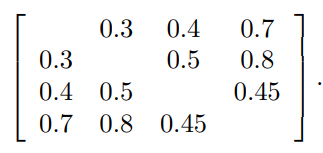

    (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.
    
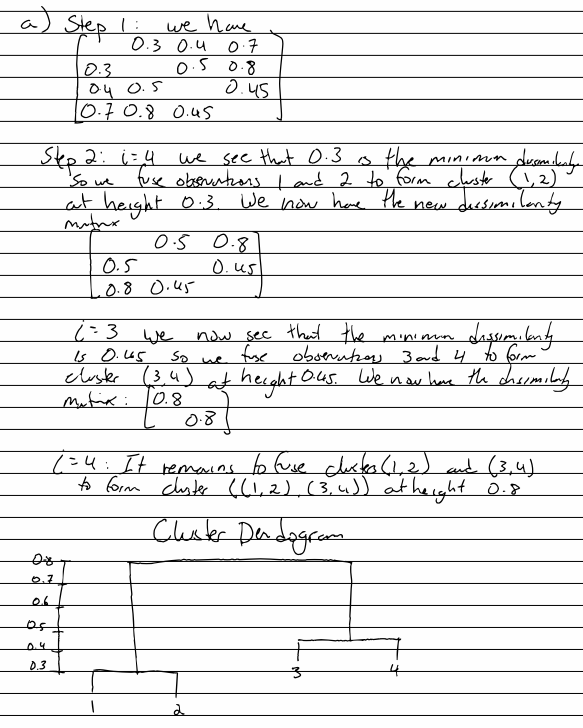
  
    (b) Repeat (a), this time using single linkage clustering.
    
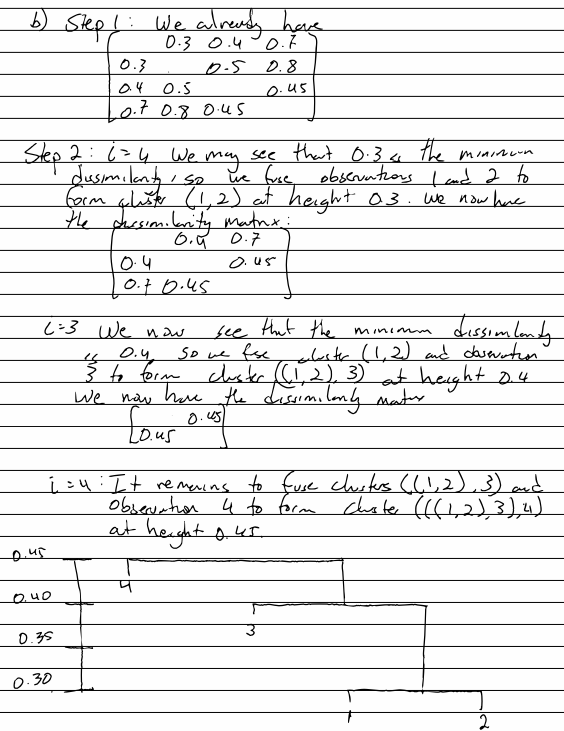

    (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.
    
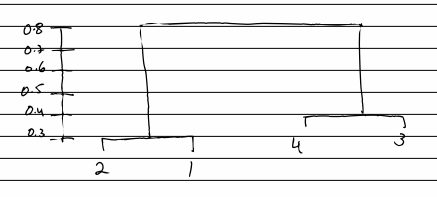
    
    

    (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?
    
        In this case, we have clusters (1, 2) and (3, 4).

    (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

        In this case, we have clusters ((1, 2), 3) and (4)